In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [51]:
def prepare_dataset(filename):
    '''
    Extract data and preprocess it
    '''
    df = pd.read_csv(filename)
    X1, X2, X3, X4, X5, X, Y = [], [], [],[], [], [],[]
    # X1 = df.X1.to_list()
    # X2 = df.X2.to_list()
    for item, rows in df.iterrows():
        X1.append(rows['X1'])
        X2.append(rows['X2'])
        X3.append(rows['X3'])
        X4.append(rows['X4'])
        X5.append(rows['X5'])

    for i in range(len(X1)):
        X.append([1,X2[i]/200,X3[i]/200,X4[i]/200,X5[i]/200]) # Normalize 
        Y.append([X1[i]])

    X = np.array(X)
    Y = np.array(Y)
    #theta1_theta2 is (XTX)-1*XTY | Inverse(X * Transpose(X)) * ( Y * Transpose(X))
    theta1_theta2 = np.linalg.inv(X.T@X)@X.T@Y
    print(theta1_theta2)
    return X,Y, theta1_theta2

In [52]:
X,Y, theta1_theta2 =  prepare_dataset('data/health.csv')

[[ 12.26625517]
 [  1.47832301]
 [  0.11674313]
 [-66.04604732]
 [ -1.89257698]]


The loss at the end of training is == 2.52565572627417


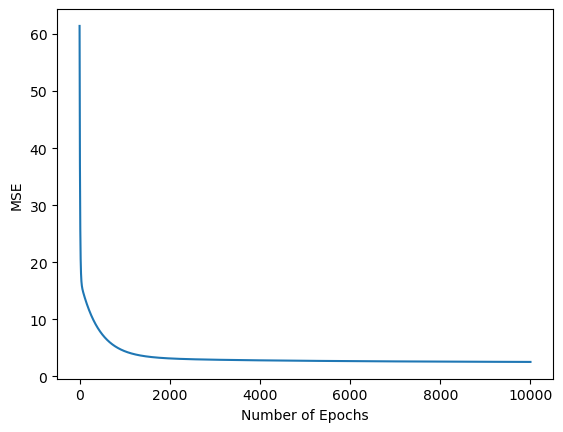

[[ 8.50098582]
 [ 2.00926591]
 [ 0.10728852]
 [-2.0777582 ]
 [-1.10702449]]


In [55]:
# Implementation of the linear regression algorithm

np.random.seed(20)


EPOCHS = 10000 # number of epochs
LR = 1e-1 # Learning Rate
BATCH_SIZE = X.shape[0] # Batch Size


theta = np.random.randn(X.shape[1],1) # Randomly initialize our theta to the shape of our X
loss = []

# Gradient Descent Algorithm
for i in range(EPOCHS):
    epoch_loss = 0.0
    for b in range(0, len(X), BATCH_SIZE):
        d_theta = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta - Y[b:BATCH_SIZE])) / BATCH_SIZE # Calculates the partial derivate of loss in respective to theta
        theta -= (2/BATCH_SIZE) * LR * (d_theta) ## Gradient descent step

        epoch_loss += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta)).mean()) ## Mean Square Error
    loss.append(epoch_loss)


print("The loss at the end of training is ==",loss[-1])
plt.plot(range(1, EPOCHS+1),loss)
plt.ylabel('MSE')
plt.xlabel('Number of Epochs')
plt.show()
print(theta)

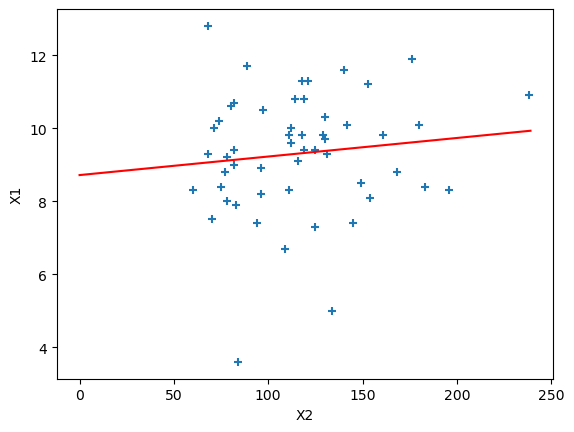

In [24]:
# Plots the best line of fit

df = pd.read_csv('data/health.csv')

X1 = df.X1.to_list()
X2 = df.X2.to_list()

X = [i for i in range(0,240)]
# Calcs the y value based on the theta_values
Y = [(theta1_theta2[0]*1 + (theta1_theta2[1]*i)) for i in range(0,240)]

plt.scatter(X2, X1, marker='+')
plt.plot(X,Y, color = 'red')
plt.ylabel('X1')
plt.xlabel('X2')
plt.show()